<a href="https://colab.research.google.com/github/Sameer-sus/Huffman-implementation/blob/main/ML_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**BITS F464 - Semester 1 - MACHINE LEARNING**
--------------------------------------------------------------------------------

**ASSIGNMENT 1 - LINEAR MODELS FOR REGRESSION AND CLASSIFICATION**
--------------------------------------------------------------------------------
***Team number: ***

---
<!--*In Title case, separated with commas*)-->
***Full names of all students in the team: TANISH, NITYA, SAMEER, MEGHANA, VIVEKA
***

---
(*Separated by commas*)
***Id number of all students in the team:*** 2021A7PS0047H, 2021AAPS2509H, 2021A4PS2484H, 2021AAPS1528H, 2021AAPS1531H


This assignment aims to identify the differences between three sets of Machine Learning models.

# **_1. Dataset Generation_**

You are given a sample Diabetes dataset. Using this, please develop your own dataset consisting of 500 records. You can use the given code to generate your own dataset. Submit the generated dataset as a .csv file along with your python notebook.

In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#data frame
diabetes_df = pd.read_csv('diabetes_synthetic_500.csv')

diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,3,141,61,29,167,18.7,0.254,33,0
1,0,123,56,6,68,22.1,0.490,44,0
2,6,94,64,37,98,40.7,0.620,21,0
3,8,137,42,18,89,36.1,0.170,21,0
4,8,123,71,10,92,39.8,0.078,39,0


To print current directory

# ***2. Preprocess and perform exploratory data analysis of the dataset obtained***

In [2]:
diabetes_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [3]:
diabetes_df.describe()[1:]


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
mean,4.154000,119.174000,69.804000,21.858000,93.5640,32.506400,0.508174,33.990000,0.36400
std,3.094096,30.763558,19.049603,14.411705,91.2399,8.088949,0.304194,10.299809,0.48163
min,0.000000,14.000000,16.000000,0.000000,0.0000,12.000000,0.078000,21.000000,0.00000
25%,2.000000,96.750000,56.000000,11.000000,0.0000,26.775000,0.271000,25.000000,0.00000
50%,4.000000,120.000000,69.500000,22.000000,79.5000,32.100000,0.490500,33.000000,0.00000
75%,6.000000,140.000000,82.000000,32.000000,154.2500,37.750000,0.724250,40.250000,1.00000
max,15.000000,199.000000,122.000000,62.000000,455.0000,58.400000,1.447000,79.000000,1.00000


In [4]:
diabetes_df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.154779,0.106457,-0.032271,0.014145,0.064129,-0.009446,0.473750,0.161336
Glucose,0.154779,1.000000,0.135865,0.105790,0.294570,0.237188,0.088339,0.247431,0.363201
BloodPressure,0.106457,0.135865,1.000000,0.201433,0.060954,0.254906,0.023784,0.261053,0.153043
SkinThickness,-0.032271,0.105790,0.201433,1.000000,0.392661,0.446452,0.204880,-0.066676,0.067803
Insulin,0.014145,0.294570,0.060954,0.392661,1.000000,0.216041,0.208449,0.041890,0.077314
BMI,0.064129,0.237188,0.254906,0.446452,0.216041,1.000000,0.130311,0.046119,0.277532
DiabetesPedigreeFunction,-0.009446,0.088339,0.023784,0.204880,0.208449,0.130311,1.000000,0.063052,0.094974
Age,0.473750,0.247431,0.261053,-0.066676,0.041890,0.046119,0.063052,1.000000,0.260088
Outcome,0.161336,0.363201,0.153043,0.067803,0.077314,0.277532,0.094974,0.260088,1.000000


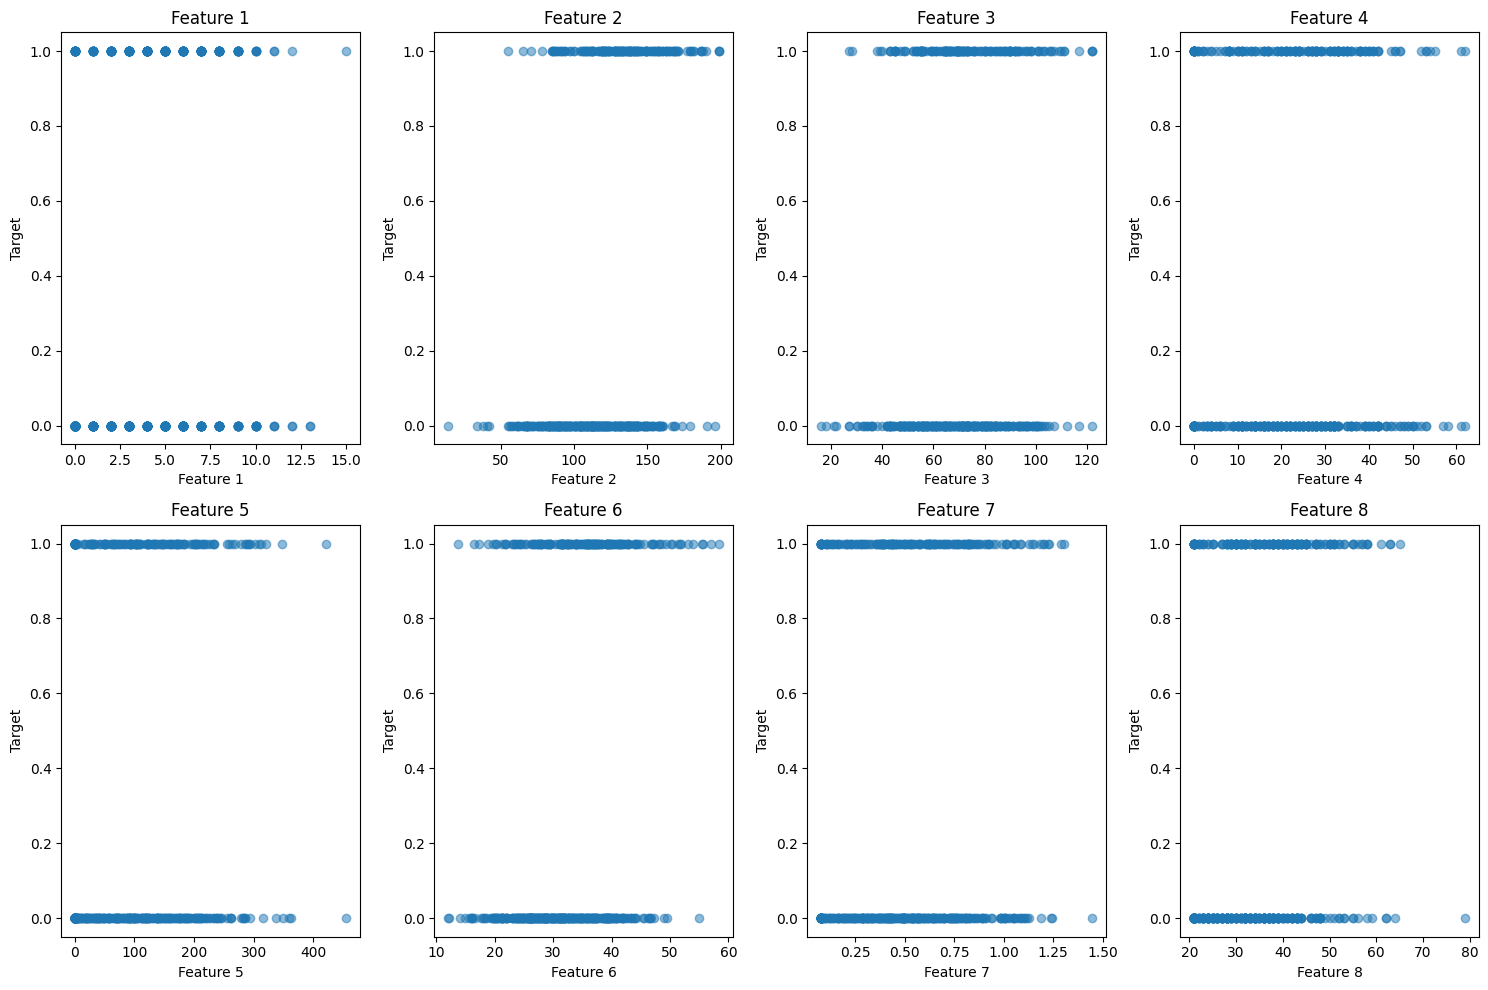

[[3.00e+00 1.41e+02 6.10e+01 ... 1.87e+01 2.54e-01 3.30e+01]
 [0.00e+00 1.23e+02 5.60e+01 ... 2.21e+01 4.90e-01 4.40e+01]
 [6.00e+00 9.40e+01 6.40e+01 ... 4.07e+01 6.20e-01 2.10e+01]
 ...
 [5.00e+00 1.05e+02 3.50e+01 ... 3.16e+01 7.80e-02 2.10e+01]
 [2.00e+00 1.47e+02 7.40e+01 ... 2.13e+01 4.26e-01 2.20e+01]
 [1.00e+01 1.40e+01 4.90e+01 ... 1.62e+01 7.01e-01 2.70e+01]]


In [5]:
features = ["Pregnancies" , "Glucose" , "BloodPressure"  , "SkinThickness" , "Insulin" , "BMI" , "DiabetesPedigreeFunction" , "Age"]
X = diabetes_df[features].values
y = diabetes_df["Outcome"].values
num_features = X.shape[1]
fig, axs = plt.subplots(2, num_features // 2, figsize=(15, 10))
axs = axs.ravel()
for i in range(num_features):
    axs[i].scatter(X[:, i], y, alpha=0.5)
    axs[i].set_title(f"Feature {i + 1}")
    axs[i].set_xlabel(f"Feature {i + 1}")
    axs[i].set_ylabel("Target")
plt.tight_layout()
plt.show()

# ***3. Comparison of Stochastic Gradient Descent and Batch Gradient Descent using Linear Regression***

## **_Stochastic Gradient Descent_**

In [6]:
X = diabetes_df[features].values
y = diabetes_df["Outcome"].values
mean = np.mean(X, axis=0)
std_dev = np.std(X, axis=0)
# Standardize the features
X_normalized = (X - mean) / std_dev

In [7]:
def SGD():
  X = diabetes_df[features].values
  mean = np.mean(X, axis=0)
  std_dev = np.std(X, axis=0)
  # Standardize the features
  X = (X - mean) / std_dev
  y = diabetes_df["Outcome"].values
  # Add a bias term (intercept) to the features
  X_with_bias = np.c_[np.ones((X.shape[0], 1)), X]
  cost_history = []
  # Initialize parameters (coefficients)
  theta = np.zeros(X_with_bias.shape[1])
  m = len(y)
  # Hyperparameters
  learning_rate = 0.01
  num_iterations = 1000

  # Stochastic Gradient Descent
  for iteration in range(num_iterations):

          # Select a random training example
          random_index = np.random.randint(0, len(y))
          xi = X_with_bias[random_index]
          yi = y[random_index]

          # Calculate the prediction for the selected example
          prediction = np.dot(xi, theta)

          # Calculate the error for the selected example
          error = prediction - yi

          # Calculate the gradient for the selected example
          gradient = xi * error

          # Update the parameters using gradient descent
          theta -= learning_rate * gradient
          cost = (1 / (2 * m)) * np.sum(np.square(prediction - y))
          cost_history.append(cost)
  predicted_probabilities = np.dot(X_with_bias, theta)
  predictionss = (predicted_probabilities >= 0.5).astype(int)


  # Print the final parameters and predictions
  print("Final Coefficients (Theta or weights vector):", theta)
  print("\nPredictions:", predictionss)
  print("\nOriginal:", y)
  return theta,cost_history,predictionss




In [8]:
sgd_theta , sgd_cost_history , predictions_sgd = SGD()

Final Coefficients (Theta or weights vector): [ 0.41533719  0.05177612  0.20248321  0.00765438 -0.01933547 -0.0036184
  0.08061074 -0.01089092  0.10519946]

Predictions: [0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0
 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0
 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 1 0 0 0 1 0 0 0
 1 1 0 0 0 0 1 0 0 1 1 0 0 1 0 0 1 1 1 0 1 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0
 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 1 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1
 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 0 0 0 0 0 0 1 1 0
 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1
 0 1 1 0 1 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 1 1 0 1
 1 0 0 0 1 1 0 1 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 1 0 1 0 1 1 0 1 0 0
 1 1 0 0 0 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 1 1 0 0 0 1 0 1 0 1 1 1 1 0 0 0
 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0
 1 0 

In [9]:

count=0
for i in range(500):
  if(predictions_sgd[i]==y[i]):
      count+=1

print("Accuracy is: ")
print((count/y.size)*100)

Accuracy is: 
72.2


## **_Batch Gradient Descent_**

In [10]:
def BGD():
  X = diabetes_df[features].values
  mean = np.mean(X, axis=0)
  std_dev = np.std(X, axis=0)
  # Standardize the features
  cost_history = []

  X = (X - mean) / std_dev
  y = diabetes_df["Outcome"].values
  m = len(y)
  # Add a bias term (intercept) to the features
  X_with_bias = np.c_[np.ones((X.shape[0], 1)), X]

  # Initialize parameters (coefficients)
  theta = np.zeros(X_with_bias.shape[1])

  # Hyperparameters
  learning_rate = 0.01
  num_iterations = 1000

  # Batch Gradient Descent
  for iteration in range(num_iterations):
      # Calculate predictions
      predictions = np.dot(X_with_bias, theta)

      # Calculate the error (difference between predictions and actual labels)
      error = predictions - y

      # Calculate the gradient
      gradient = np.dot(X_with_bias.T, error) / len(y)

      # Update the parameters using gradient descent
      theta -= learning_rate * gradient
      costs = (1 / (2 * m)) * np.sum(np.square(predictions - y))
      cost_history.append(costs)
  # Predictions
  predicted_probabilities = np.dot(X_with_bias, theta)
  predictions = (predicted_probabilities >= 0.5).astype(int)

  # Print the final parameters and predictions
  print("Final Coefficients (Theta or weights vector):", theta)
  print("\nPredictions:", predictions)
  print("\nOriginal:", y)
  return theta , cost_history , predictions




In [11]:
bgd_theta , bgd_cost_history , predictions_bgd = BGD()

Final Coefficients (Theta or weights vector): [ 0.36398429  0.01284563  0.13514453  0.0124893  -0.02046923 -0.02662284
  0.10556174  0.02480547  0.07557683]

Predictions: [0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1
 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0
 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1
 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1
 0 0 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0
 1 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0
 1 0

In [12]:
#Give accuracy
count=0
for i in range(500):
  if(predictions_bgd[i]==y[i]):
      count+=1

print("Accuracy is: ")
print((count/y.size)*100)


Accuracy is: 
74.6


## **_Insights drawn (plots, markdown explanations)_**

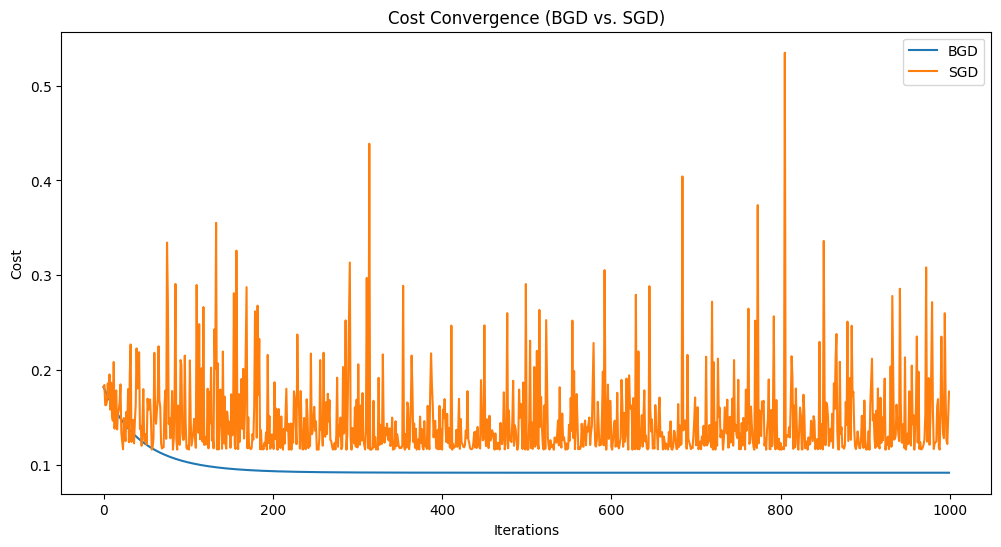

BGD Execution Time: 0.0001 seconds
SGD Execution Time: 0.0000 seconds


In [13]:
start_time = time.time()
bgd_time = time.time() - start_time

# Measure time taken by SGD
start_time = time.time()
sgd_time = time.time() - start_time

# Plot the cost convergence
plt.figure(figsize=(12, 6))
plt.plot(range(1000), bgd_cost_history, label='BGD')
plt.plot(range(1000), sgd_cost_history, label='SGD')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.title('Cost Convergence (BGD vs. SGD)')
plt.show()

print(f"BGD Execution Time: {bgd_time:.4f} seconds")
print(f"SGD Execution Time: {sgd_time:.4f} seconds")

We can see BGD takes more time compared to SGD because of the increased time complexity. The difference here might seem small but when the data is scaled to suppose a million elements, we''ll notice a significant increase in time taken. On the other hand we can see that BGD is more accurate than SGD as provides a more deterministic path to the solution and can be less sensitive to noise in the data.
Hence we can say that the choice between BGD, SGD, or mini-batch SGD depends on the specific problem, the size of the dataset, the computational resources available, and the desired trade-offs between convergence speed, generalization, and the risk of getting stuck in local minima.

# **_4. Comparison of Lasso and Ridge Regression using Polynomial Regression_**

## **_Lasso Regression_**

## **_Ridge Regression_**

Loading dataset

Standardizing features of dataset

## **_Insights drawn (plots, markdown explanations)_**

# **_5. Comparison of Logistic Regression and Least Squares Classification_**

## **_Logistic Regression_**

## **_Least Squares Classification_**

In [14]:
# Add a bias term (column of 1s) to X
X_bias = np.column_stack((np.ones(X.shape[0]), X))

# Compute weights using the least squares formula
X_transpose = np.transpose(X_bias)
weights = np.linalg.inv(X_transpose.dot(X_bias)).dot(X_transpose).dot(y)
print(weights)


[-8.80896146e-01  4.09558527e-03  4.39664756e-03  6.49677814e-04
 -1.42403624e-03 -2.92547621e-04  1.30815027e-02  8.15764309e-02
  7.36622031e-03]


## **_Insights drawn (plots, markdown explanations)_**

# **_5. References_**

1.  SGD from scratch github
(https://github.com/arseniyturin/SGD-From-Scratch/blob/master/Gradient%20Descent.ipynb)

2.  https://www.analyticsvidhya.com/blog/2022/01/diabetes-prediction-using-machine-learning/

3. ChatGPT for debugging and understand codes

4.

